In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

### 训练过程中，一些评价模型的示例

```py
def train_step():
    ....
    metrics = {
        'acc': balanced_accuracy_score(y_all, pred_all),
        'recall':recall_score(y_all, pred_all, average=None),
        ....
    }
    return metrics
```
https://jiarong-l.github.io/notes/Statistics/Basis_Model_Evaluation/

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://www.cnblogs.com/mdevelopment/p/9456486.html

https://blog.csdn.net/weixin_43378396/article/details/90695013

In [2]:
y_true = [1]*15 + [0]*5                    ## (10+5)/20 = acc
y_pred = [1]*10 + [0]*10
weight = [2]*20

accuracy_score(y_true, y_pred, normalize=True, sample_weight=weight)

0.75

In [3]:
##  适合标签分布不均衡的情况
y_true = [1]*15 + [0]*5                    ## adjusted=False: (10/15 + 5/5)/2 = (acc_1 + acc_0)/2
y_pred = [1]*10 + [0]*10                   ## adjusted=True: adjusted for chance
weight = [2]*20

balanced_accuracy_score(y_true, y_pred, sample_weight=weight, adjusted=True)

0.6666666666666665

In [4]:
y_true = [1]*12 + [0]*8       
y_pred = [1]*10 + [0]*10           
                                 ## precision=tp/(tp+fp)            recall=tp/(tp+fn)
                                 ##          = 10/(10+0)                  = 10/(10+2)
confusion_matrix(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred)

(array([[ 8,  0],
        [ 2, 10]], dtype=int64),
 1.0,
 0.8333333333333334)

[0.66666667 0.625      0.71428571 0.83333333 0.8        0.75
 0.66666667 1.         1.         1.        ] [1.         0.83333333 0.83333333 0.83333333 0.66666667 0.5
 0.33333333 0.33333333 0.16666667 0.        ] [1 2 3 4 5 6 7 8 9]


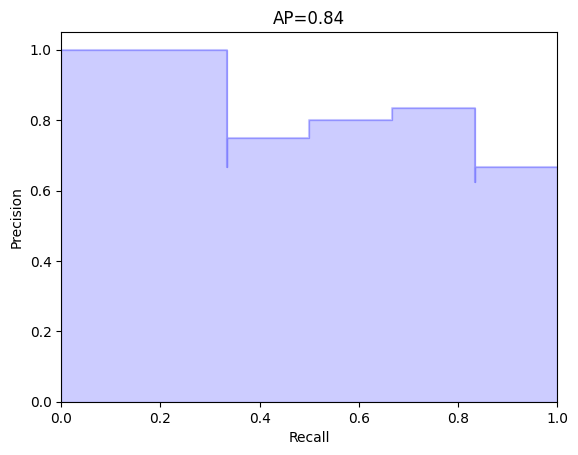

In [5]:
y_true = [1,1,0,1,1,1,0,0,1]
y_score = [9,8,7,6,5,4,3,2,1]  ## pred_score

AP = average_precision_score(y_true, y_score) 
precision,recall,thresholds = precision_recall_curve(y_true, y_score, pos_label=1)  ## 只支持二分类

from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('AP={0:0.2f}'.format(AP))

print(precision,recall,thresholds)

[0.         0.         0.         0.33333333 0.33333333 1.
 1.        ] [0.         0.16666667 0.33333333 0.33333333 0.83333333 0.83333333
 1.        ]


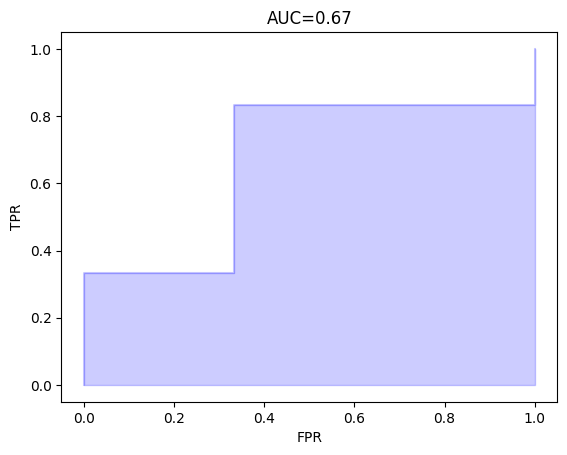

In [6]:
y_true = [1,1,0,1,1,1,0,0,1]
y_score = [9,8,7,6,5,4,3,2,1]  ## pred_score

auc = roc_auc_score(y_true, y_score) ## 支持多分类
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)  ## 只支持二分类

from inspect import signature
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC={0:0.2f}'.format(auc))
print(fpr, tpr)